In [1]:
import pandas as pd

In [2]:
df_fields = pd.read_csv('../data/new_fields.csv', delimiter=';', decimal=',', skiprows=[0, 2])
df_value = pd.read_csv('../data/new_value.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['inv_item_date'], date_format={'inv_item_date': '%d.%m.%Y'})
df_works = pd.read_csv('../data/new_works.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['start_date', 'end_date'], date_format={'start_date': '%d.%m.%Y', 'end_date': '%d.%m.%Y'})

df_works['area'] = df_works['area'].str.replace(',', '.').astype(float)

In [3]:
df_fields.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,Unnamed: 18
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,243.16,226.93,4.46,5.78,NaN
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,243.16,226.93,4.46,5.78,NaN
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,219.78,204.60,3.85,5.72,NaN
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,205.15,192.28,6.49,5.94,NaN
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,183.26,162.69,6.16,5.94,NaN


In [4]:
df_works.isnull().sum()

season                0
field                 0
work_type             0
work_subtype          0
start_date            0
end_date           9004
area                  0
main_tech             0
add_tech          48540
mech                  0
proc_depth       132562
prod_purpose     140822
prod_weight           0
prod_dry_perc    161715
prod_humid       151128
prod_impur       151128
yield_fact            0
work_id               0
dtype: int64

In [5]:
df_works['work_subtype'].unique()

array(['Боронование', 'Дискование', 'Вспашка', 'Обработка СЗР',
       'Культивация', 'Внесение СЗР и удобрений', 'Прикатывание',
       'Внесение органических удобрений',
       'Внесение жидких органических удобрений',
       'Внесение минеральных удобрений', 'Сев с внесением удобрений',
       'Глубокорыхление', 'Сев без внесения удобрений', 'Мульчирование',
       'Уборка трав', 'Дератизация', 'Прессование', 'Уборка камней',
       'Сгребание в валки', 'Вывоз', 'Кошение', 'Подбор (корм)',
       'Междурядная обработка без внесения', 'Ворошение',
       'Уборка силос/карнаж', 'Подбор', 'Заготовка сенажа',
       'Подбор и обмолот', 'Прямое комбайнирование',
       'Вывоз (тех.культуры)', 'Копка'], dtype=object)

In [6]:
valid_work_subtypes = ['Прямое комбайнирование', 'Подбор и обмолот', 'Заготовка сенажа', 'Уборка силос/карнаж', 'Подбор (корм)', 'Вывоз', 'Прессование']
df_yield_fact = df_works.query(f"work_type == 'Уборка' and work_subtype in {valid_work_subtypes}")[['season', 'field', 'yield_fact', 'area']]
df_yield_fact = df_yield_fact.groupby(by=['field', 'season']).sum().reset_index()

df_yield_fact.head()

,field,season,yield_fact,area
0,02.09.02.002.01,2023,6.27,120.25
1,02.09.02.002.01,2024,0.00,120.25
2,02.09.02.015.00,2023,9.83,36.34
3,02.09.02.019.00,2023,2.15,50.78
4,02.09.03.032.00,2023,1040.72,105.42


In [7]:
df_fields_tmp = df_fields[['season', 'field', 'p2o5', 'k2o', 'humus', 'ph', 'crop', 'yield_plan']]
df_fields_tmp.head()

,season,field,p2o5,k2o,humus,ph,crop,yield_plan
0,2023,22.47.01.001.01,243.16,226.93,4.46,5.78,Оз.пшеница мягкая,3.8
1,2023,22.47.01.001.02,243.16,226.93,4.46,5.78,Пар,NaN
2,2023,22.47.01.002.00,219.78,204.60,3.85,5.72,Пар,NaN
3,2023,22.47.01.003.00,205.15,192.28,6.49,5.94,Оз.пшеница мягкая,3.8
4,2023,22.47.01.004.00,183.26,162.69,6.16,5.94,Оз.пшеница мягкая,3.8


In [8]:
df = df_fields_tmp.merge(df_yield_fact, how='left', on=['field', 'season'])
df = df.dropna()

df.head()

,season,field,p2o5,k2o,humus,ph,crop,yield_plan,yield_fact,area
0,2023,22.47.01.001.01,243.16,226.93,4.46,5.78,Оз.пшеница мягкая,3.8,2917.65,306.22
3,2023,22.47.01.003.00,205.15,192.28,6.49,5.94,Оз.пшеница мягкая,3.8,51.65,635.25
4,2023,22.47.01.004.00,183.26,162.69,6.16,5.94,Оз.пшеница мягкая,3.8,42.25,539.28
7,2023,22.47.01.006.02,214.17,215.49,4.40,5.67,Оз.пшеница мягкая,3.8,18.89,63.33
9,2023,22.47.01.007.02,202.62,188.54,4.84,5.56,Оз.пшеница мягкая,3.8,15.76,85.55


In [9]:
df.shape

(9072, 10)

In [10]:
import matplotlib.pyplot as plt

In [11]:
def remove_outliers_iqr(df, column, k = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

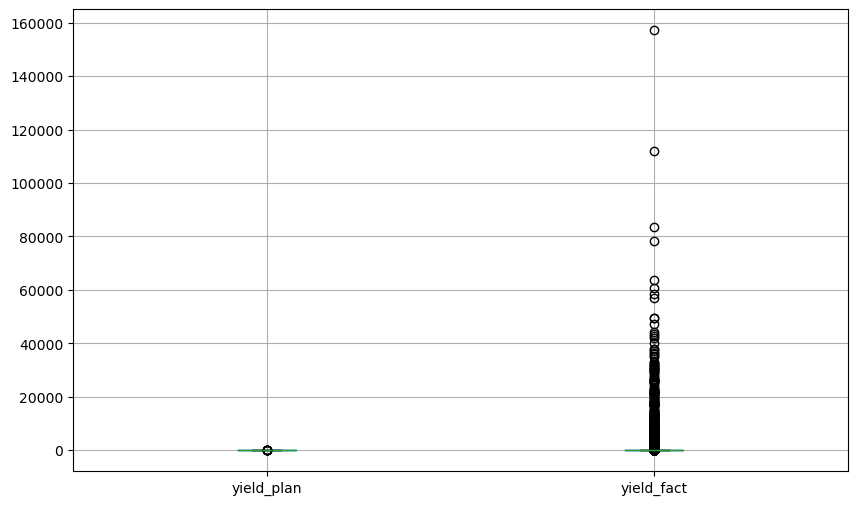

In [12]:
df.boxplot(column=['yield_plan', 'yield_fact'], figsize=(10, 6))

plt.show()

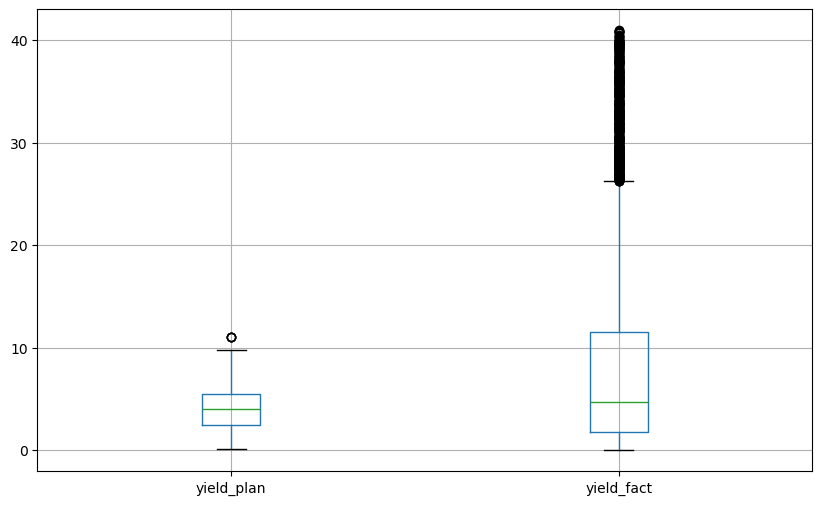

In [13]:
cleaned_df = remove_outliers_iqr(df, 'yield_fact', k=1.5)

cleaned_df.boxplot(column=['yield_plan', 'yield_fact'], figsize=(10, 6))

plt.show()

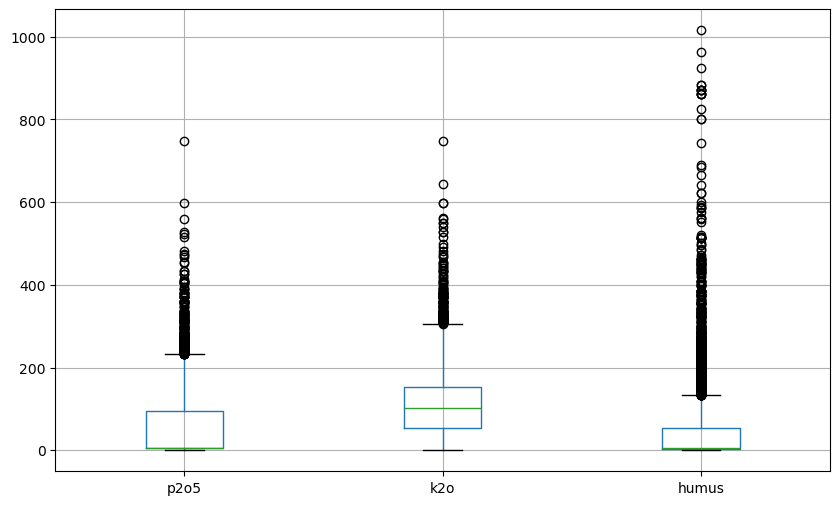

In [14]:
cleaned_df.boxplot(column=['p2o5', 'k2o', 'humus'], figsize=(10, 6))
plt.show()

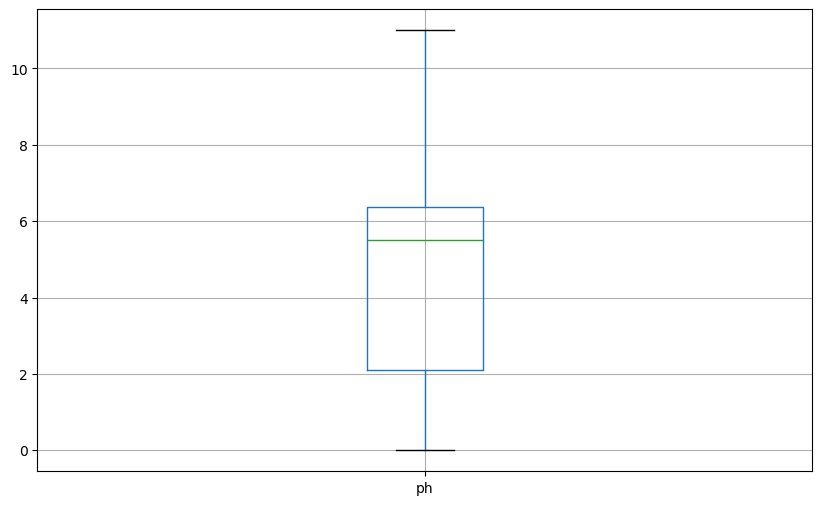

In [15]:
cleaned_df.boxplot(column='ph', figsize=(10, 6))

plt.show()

In [16]:
import seaborn as sns

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [ ]:
corrs = df.dropna().corr().round(3).sort_values('yield_fact')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)